### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this fileas a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

**independent variable** : the color words/ink color combination

**dependent variable** : time takes to name the ink color under different situation

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**hypothesis**

H<sub>0</sub>(null hypothesis): the Congruent or incongruent in ink colors/color word will make no difference on time spend on naming ink colors

or the mean of congruent group and incongruent group is same

H<sub>a</sub>(alternative hypothesis): the Congruent or incongruent in ink colors/color word will make difference on time spend on naming ink colors

or the mean of congruent group and incongruent group are not the same

**statistical test**
I will use independent two sample t-test with 95% confidence interval
I choose this test because:
    1. we are comparing the difference between two groups of data
    2. the poputlation variance and population means are unknown
    3. the sample size is much smaller than 30 so the normal approximation can't be used
    4. I pick one tail because we only expect to know if the mean of one set of data is smaller than the mean of another set. We are not test on the exsistence of difference.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

**central tendency**

 | Congruent | Incongruent
--- | --- | --- 
mean |14.051125| 22.015917

**variability**

 | Congruent | Incongruent
--- | --- | --- 
standard deviation | 3.559358 | 4.797057

In [1]:
#code for the descriptive statistics
import pandas as pd
import numpy as np
df = pd.read_csv('./stroopdata.csv')
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

**box plot**

It is obvious that testees spend more time on identify ink colors under incongruent condition compare to the testees under congruent condition.

Statistically speking, the median time of congruent condition is below the 1st quantile of congruent condition, which means half of congruent testees' performance is better than 75% of testees's under incongruent condition. 
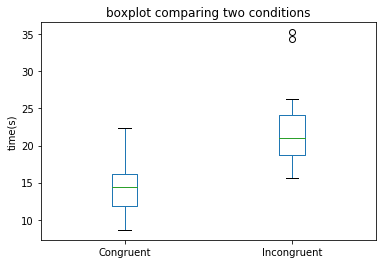

**histogram**

This side by side histogram also demostrated same information as the box plot does. However, this graph also shows that about 10 testees under congruent condition finshed the testing list under 10 seconds or less while none of the testees under incongruent condition finished the list within 15 seconds. Also, none of the congruent testees takes more than 25 seconds to finish the list but 5 incongruent testees took more than 25 seconds.
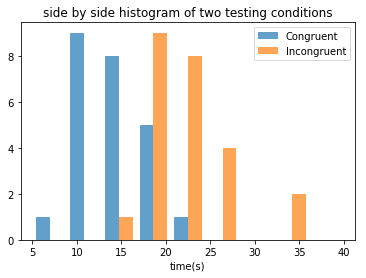

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#create box plot
df.plot(kind='box')
plt.title('boxplot comparing two conditions')
plt.ylabel('time(s)')
#plt.show()

#create histograms comparing each individual trial
#bins = np.linspace(5, 40, 10)
#plt.hist(df['Congruent'], bins=[5, 10, 15, 20, 25, 30, 35])
#plt.hist(df['Incongruent'], bins=[5, 10, 15, 20, 25, 30, 35])
x = df['Congruent']
y = df['Incongruent']
data = np.vstack([x, y]).T
bins = np.linspace(5, 40, 10)

plt.title('side by side histogram of two testing conditions')
plt.xlabel('time(s)')
plt.hist(data, bins, alpha=0.7, label=['Congruent', 'Incongruent'])
plt.legend(loc='upper right')
#plt.show()


(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [8]:
from scipy import stats
sp.stats.ttest_ind(x, y, axis=0, equal_var = False)

Ttest_indResult(statistic=-6.5322505539032285, pvalue=6.5101673904426379e-08)

The two sample independent test results are listed above. The p value is well below 0.05 which means we rejected the null hypothesis since the cinfidence level is 95%. 

The critical statistic value is -6.5322505539032285.

The congruent and incongruent conditions do make difference on time spend on naming ink colors. 

This result matched my expectiations because the data visulization showing that these two sets of data have difference. 

### reference

- calculate descriptive statistics:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
- box plot and histogram using pandas: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
- histogram side by side: https://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib
- two sample t-test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html